## Link 
https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

- 꿀팁1. 몰랐던 copy함수의 깊은 복사와 얕은 복사
- 꿀팁2. 수치형, 범주형 변수 한 번에 describe 가능
- 꿀팁3. 전처리 코드가 깔끔해서 기록해놓고 참고하기
- 꿀팁4. 정규표현식 사용 안하고 split으로 Name에서 Title추출하는 법
- 꿀팁5. apply, lambda 한 번 더 살펴보기
- 꿀팁6. labelencoder() -> code categorical data
- 꿀팁(논의사항). 아래처럼 나눠서 여러 데이터셋을 생성해둠...!
- 꿀팁7. 범주별 개수 파악에 용이한 crosstab
- 꿀팁8. subplot -> 여러 개 그래프 그리는 가장 쉬운 방법
- 꿀팁9. boxplot 평균 표시
- 꿀팁10, sns 활용시, 그래프 여러 개 한번에 그리는 법
- 꿀팁11. sns.pointplot, 연속적이지 않은 자료의 시각화
- 꿀팁12. 처음보는 kdeplot(kde: 커널밀도추정)
- 꿀팁13. FacetGrid 한 번 더 이해하기
- 꿀팁(논의사항) -> def에서 '_' 역할 물어보기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

## Step1: Define the Problem

- to predict the survival outcome of passengers on the Titanic
- in this challenge, we ask you to complete the analysis of what sorts of people were likely to survive.

## Step2: Gather the Data

## Step3. Prepare Data for Consumption

### 3.1 Import Libraries

In [3]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/drive/My Drive/a_ohson_study/Titanic"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
pandas version: 1.3.5
matplotlib version: 3.2.2
NumPy version: 1.21.6
SciPy version: 1.7.3
IPython version: 7.9.0
scikit-learn version: 1.0.2
-------------------------
gender_submission.csv
test.csv
Titanic_copying_1.ipynb
Titanic_copying_2.ipynb
train.csv



In [4]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix # from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

### 3.2 Meet and Greet Data

- passengerID: excluded
- Pclass: 1, 2, 3
- Name: to derive the gender from title, family size from surname, and SES from titles like doctor or master.
- SibSp, Parch: create a family size
- Cabin: there are many null values -> excluded

In [5]:
data_raw = pd.read_csv('/content/drive/My Drive/a_ohson_study/Titanic/train.csv')
data_val = pd.read_csv('/content/drive/My Drive/a_ohson_study/Titanic/test.csv')

data1 = data_raw.copy(deep=True)

'''꿀팁1. 몰랐던 copy함수의 깊은 복사와 얕은 복사
deep = True인 경우를 deep copy라고 하며 원본과는 완전하게 별개인 복사본이 생성. 사본과 원본의 수정은 서로에게 영향을 끼치지 않음.
deep = False인 경우를 shallow copy라고 하며 원본의 데이터 및 인덱스를 복사하지않고 새 객체를 호출.
즉, 원본의 데이터가 수정되면 사본의 데이터도 수정되며, 그 반대도 마찬가지.
'''

data_cleaner = [data1, data_val]

print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### The 4 C's of Data Cleaning: Correcting, Completing, , and Converting
1. Correcting: 비정상적인 데이터 입력이 있거나 특이값이 있는지 확인하고 수정하는 과정
2. Completing: 결측치 처리
- 질적데이터: 최빈값이 기본 방법
- 양적데이터: 평균, 중위수 또는 평균+(randomized)표준 편차
3. Creating: 새로운 변수 생성
4. Converting: 변수의 포맷 변환, 범주형 변수의 더미변수화

In [6]:
print('Train columns with null vlaues:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null vlaues:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include='all') # 꿀팁2. 수치형, 범주형 변수 한 번에 describe 가능

Train columns with null vlaues:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null vlaues:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# COMPLETING: complete or delete missing values in train and test/validation dataset
# 꿀팁3. 전처리 코드가 깔끔해서 기록해놓고 참고하기

for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True) # 범주형의 최빈값은 [0]으로 값만 추출

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum()) 

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [8]:
#CREATE: Feature Engineering for train and test/validation dataset

for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name
    # 꿀팁4. 정규표현식 사용 안하고 split으로 Name에서 Title추출하는 법
    # # split() -> expand=True이면 여러 컬럼, False이면 1개 컬럼에 리스트
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [9]:
dataset['Name'].str.split(", ", expand=True).head(2)

,0,1
0,Kelly,Mr. James
1,Wilkes,Mrs. James (Ellen Needs)


In [10]:
dataset['Name'].str.split(", ", expand=False).head(2)

0                    [Kelly, Mr. James]
1    [Wilkes, Mrs. James (Ellen Needs)]
Name: Name, dtype: object

In [11]:
print(data1['Title'].value_counts())
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x) # 꿀팁5. apply, lambda 한 번 더 살펴보기
print(data1['Title'].value_counts())
print("-"*10)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [12]:
# preview data again
data1.info()
data_val.info()
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,C,2,0,Mrs,"(14.454, 31.0]","(-0.08, 16.0]"
210,0,3,"Ali, Mr. Ahmed",male,24.00,0,0,7.0500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
136,1,1,"Newsom, Miss. Helen Monypeny",female,19.00,0,2,26.2833,S,3,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,14.5000,S,3,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
518,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.00,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
683,0,3,"Goodwin, Mr. Charles Edward",male,14.00,5,2,46.9000,S,8,0,Mr,"(31.0, 512.329]","(-0.08, 16.0]"
321,0,3,"Danoff, Mr. Yoto",male,27.00,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
387,1,2,"Buss, Miss. Kate",female,36.00,0,0,13.0000,S,1,1,Miss,"(7.91, 14.454]","(32.0, 48.0]"
634,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,27.9000,S,6,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
255,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.00,0,2,15.2458,C,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"


In [13]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#꿀팁6. code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

#define y variable aka target/outcome
Target = ['Survived']

# 꿀팁(논의사항). 아래처럼 나눠서 여러 데이터셋을 생성해둠...!

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')

#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [14]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [15]:
#split train and test data with function defaults

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


## Step 4: Perform Exploratory Analysis with Statistics

In [16]:
#Discrete Variable Correlation by Survival using

for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

## Step4. Perform Exploratory Analysis with Statistics

In [17]:
#Discrete variable correlation by Survival using group by aka pivot table

for x in data1_x:
  if data1[x].dtype != 'float64':
    print('Survival Correlation by:', x)
    print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
    print('-'*10, '\n')
  
print(pd.crosstab(data1['Title'], data1[Target[0]])) # 꿀팁7. 범주별 개수 파악에 용이한 crosstab

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

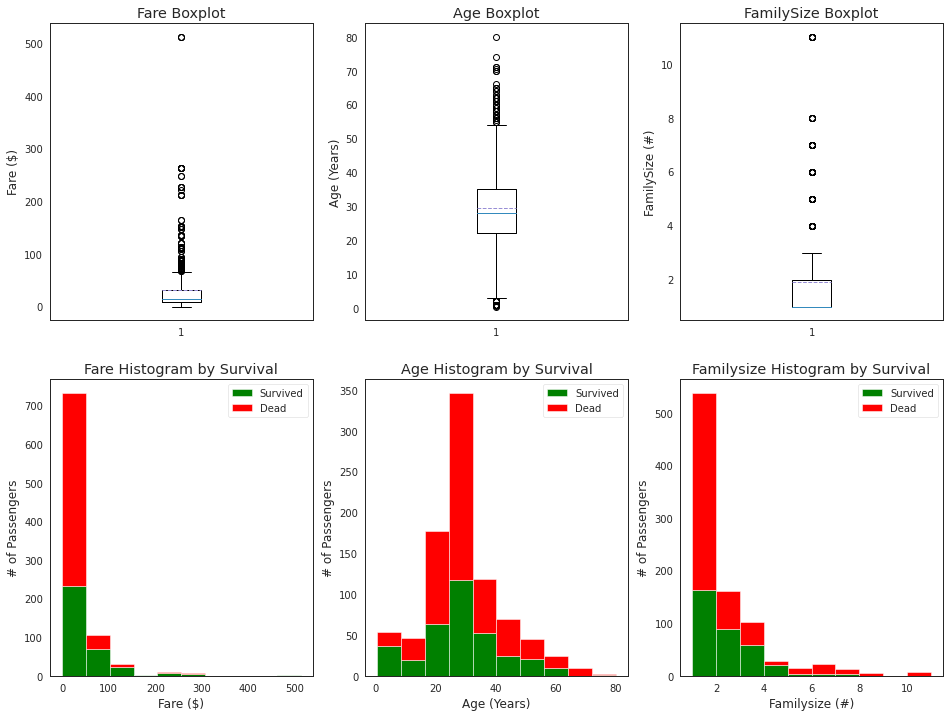

In [18]:
# graph distribution of quantitative data
plt.figure(figsize=[16, 12])

plt.subplot(231) # 꿀팁8. subplot -> 여러 개 그래프 그리는 가장 쉬운 방법
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True) # 꿀팁9. boxplot 평균 표시
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x=data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(x=data1['FamilySize'], showmeans=True, meanline=True)
plt.title('FamilySize Boxplot')
plt.ylabel('FamilySize (#)')

plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Familysize Histogram by Survival')
plt.xlabel('Familysize (#)')
plt.ylabel('# of Passengers')
plt.legend()

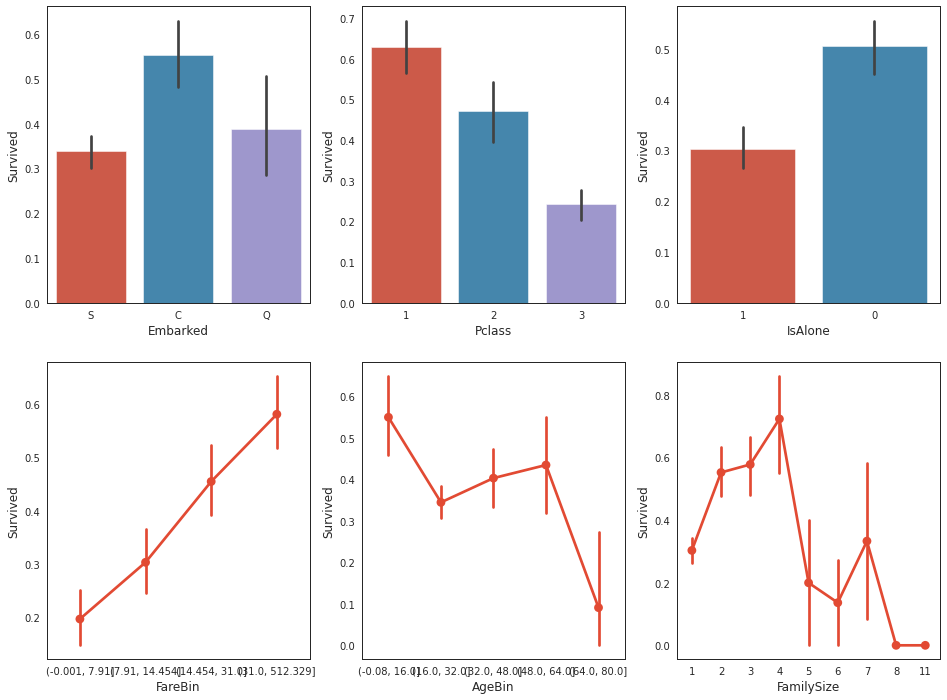

In [19]:
#multi-variable comparison

fig, saxis = plt.subplots(2, 3, figsize=(16, 12)) # 꿀팁10, sns활용시, 그래프 여러 개 한번에 그리는 법

sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0,0])
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1, ax=saxis[0,1])
sns.barplot(x='IsAlone', y='Survived', order=[1,0], data=data1, ax=saxis[0,2])

sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[1,0]) # 꿀팁11. sns.pointplot, 연속적이지 않은 자료의 시각화
sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1,1])
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1,2])

Text(0.5, 1.0, 'Pclass vs FamilySize Survival Comparison')

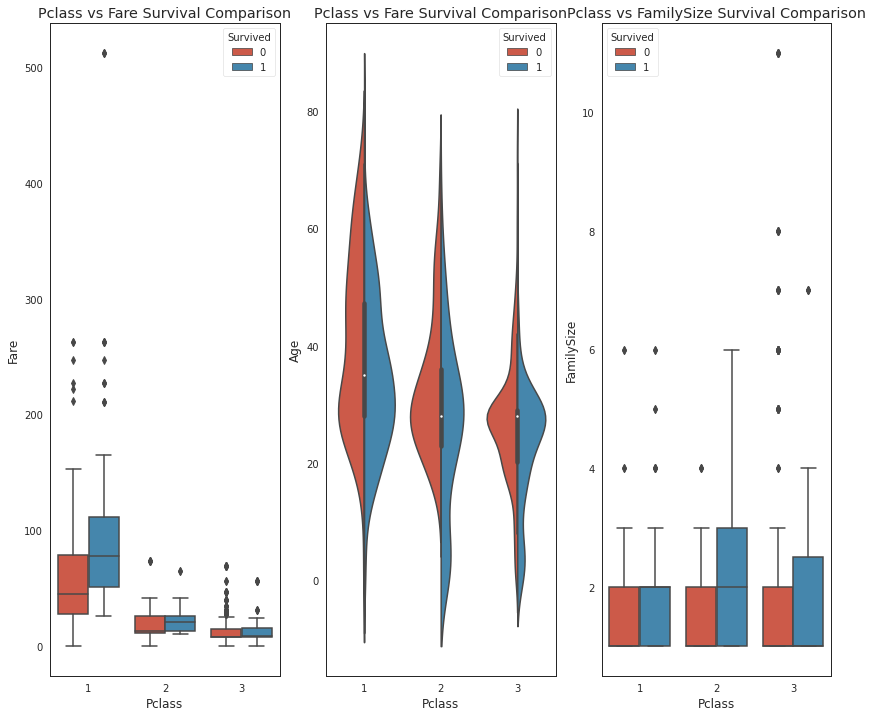

In [20]:
# graph distribution of qualitative data: Pclass
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(14, 12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data1, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data1, split=True, ax=axis2)
axis2.set_title('Pclass vs Fare Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=data1, ax=axis3)
axis3.set_title('Pclass vs FamilySize Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

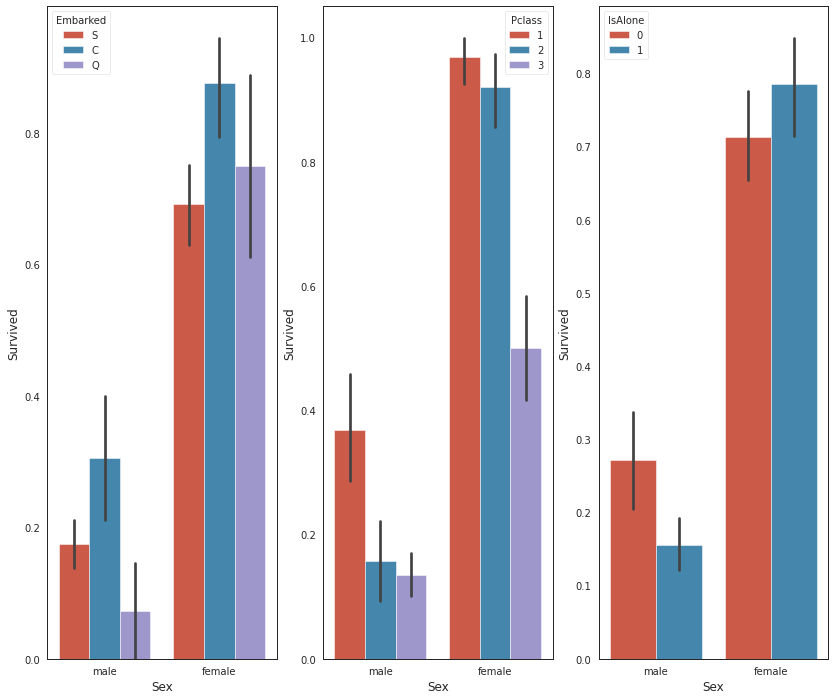

In [21]:
#graph distribution of qualitative data: Sex
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

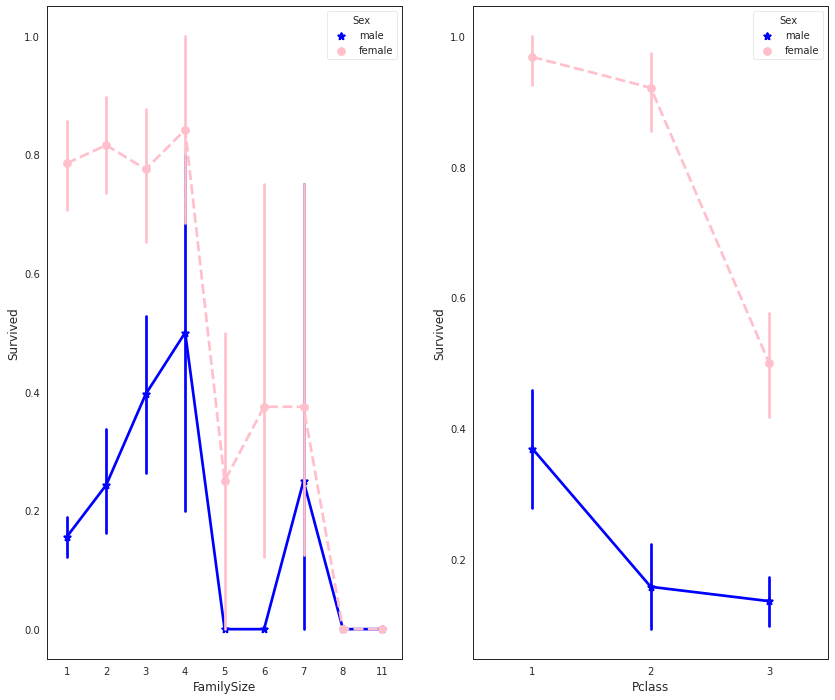

In [22]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

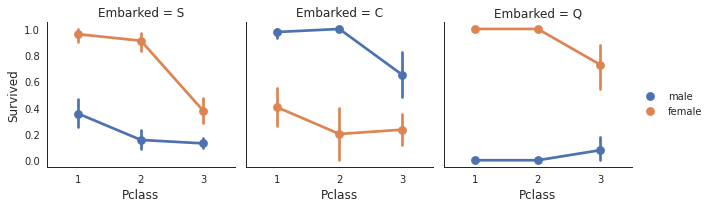

In [23]:
#how does embark port factor

e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

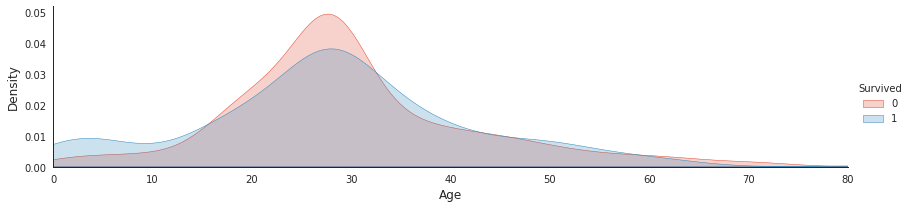

In [24]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True ) # 꿀팁12. 처음보는 kdeplot(kde: 커널밀도추정)
'''kde설명
막대그래프의 단점: 분포를 확인하기 어려움
히스토그램의 단점: 구간 설정에 따라 결과 해석이 달라짐
위의 단점들을 보완. 히스토그램을 부드럽게 곡선화하여 나타냄
'''
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

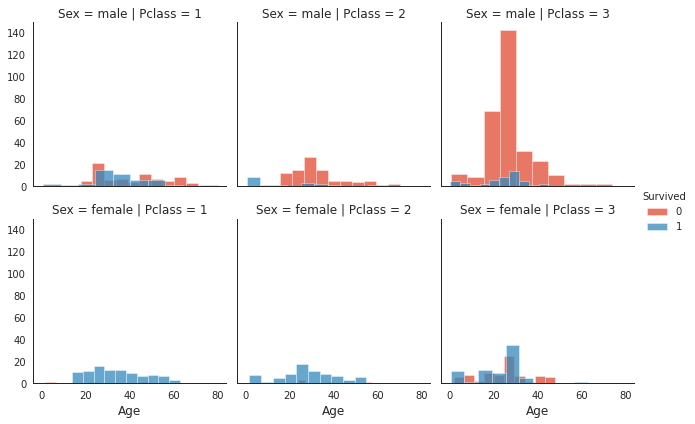

In [25]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived') # 꿀팁13. FacetGrid 한 번 더 이해하기
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

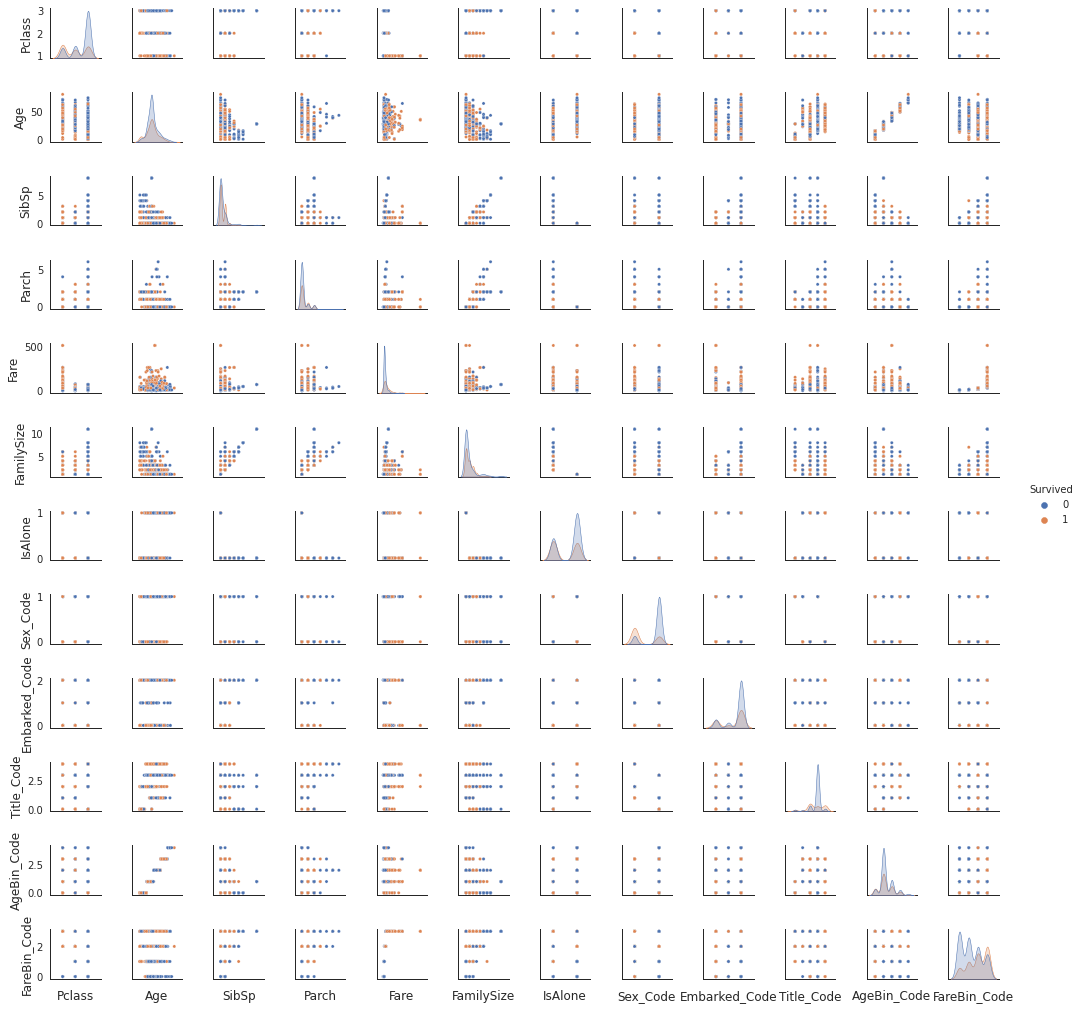

In [26]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

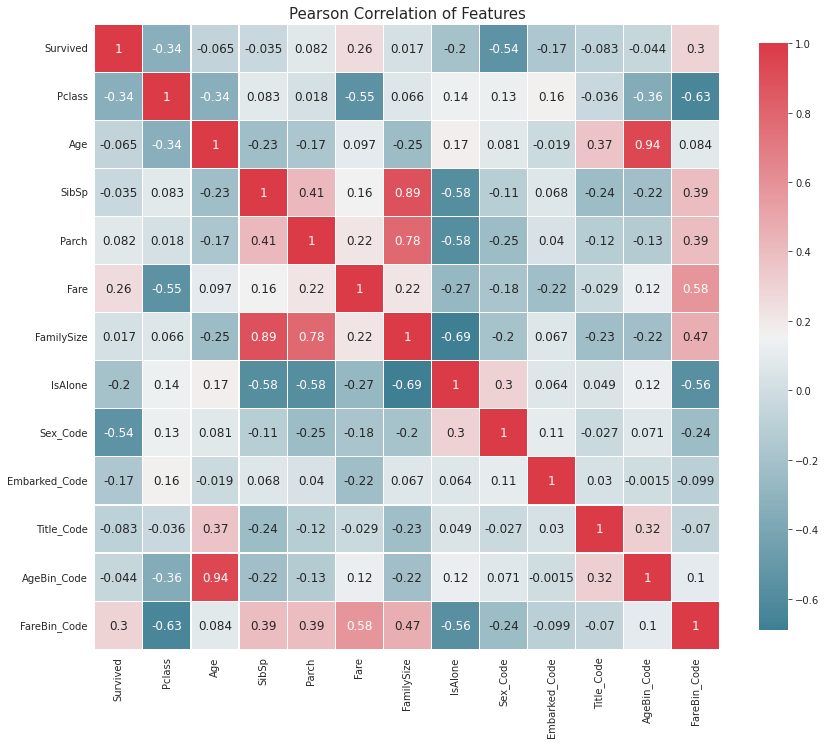

In [27]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12)) # 꿀팁(논의사항) -> _ 역할 물어보기
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

# Step5. Model Data

In [30]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost
    XGBClassifier()    
    ]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
  #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)
    print(cv_results)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    # MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

{'fit_time': array([0.16406488, 0.07755852, 0.08837914, 0.13041592, 0.20850968,
       0.14277649, 0.19075704, 0.13082767, 0.20882463, 0.1253612 ]), 'score_time': array([0.01155543, 0.01062012, 0.02914095, 0.03343558, 0.03841472,
       0.02843451, 0.01936173, 0.02827525, 0.02229619, 0.02516317]), 'test_score': array([0.81716418, 0.79104478, 0.80970149, 0.79850746, 0.82835821,
       0.80597015, 0.79477612, 0.79850746, 0.8358209 , 0.83955224])}
{'fit_time': array([0.03409958, 0.04067397, 0.04553771, 0.04301023, 0.03886867,
       0.04626656, 0.04167414, 0.03703213, 0.03647804, 0.0582335 ]), 'score_time': array([0.00576878, 0.00645137, 0.01464891, 0.00740314, 0.0056076 ,
       0.00546145, 0.00544906, 0.0170598 , 0.00616193, 0.00548577]), 'test_score': array([0.82835821, 0.82089552, 0.80597015, 0.8358209 , 0.83955224,
       0.81343284, 0.81716418, 0.79477612, 0.79477612, 0.88059701])}
{'fit_time': array([0.27377081, 0.26056385, 0.24135184, 0.1517334 , 0.1146698 ,
       0.11323571, 0.1

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",NaN,0.829478,0.052755,0.043845
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",NaN,0.827612,0.040916,0.054128
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",NaN,0.826119,0.062966,0.156936
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",NaN,0.826119,0.045663,0.064975
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",NaN,0.823134,0.072234,0.042187
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",NaN,0.822761,0.059286,0.16028
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",NaN,0.822761,0.049873,0.081767
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",NaN,0.820522,0.056294,0.003175
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",NaN,0.816045,0.053929,0.00286
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",NaN,0.81194,0.049861,0.146748
